### 2
1. An example of a real-world application that address accuracy could a diagnostic model that evaluates whether or not a certain patient has a disease. Ideally, if the patient does not have the disease the test will return negative and if they do, then the test will return positive. These would be a true negative and true positive scenario respectively. There is also a likelihood of a false positive, when the patient doesn't have the disease but the test says they do, or a false negative when they do have the disease but the test says they dont. We would want to minimize this number as much as possible, which would make the accuracy as high as possible. The more accurate a test is the more reliable it is, and the more useful it would be in something that is high stakes, such as this. 
2. Sensitivity would be particularly useful in detecting fradulent banking. Suppose a bank sends a notice to their customer every time fradulent banking is detected. We don't really mind if a notification is sent and the banking isn't actually fradulent (false positive), because it just helps ensure safety of money and this is what is most important. However, we do care if the banking is fradulent and it isn't detected (false negative). We want to minimize this number as much as possible. So, having a high sensitivity is the most important thing in this scenario, because it means we have a high detection rate of all the positives, and fraudulent banking rarely goes undetected. 
3. An example where specificity is important would be DNA analysis from a crime scene. Specificity measures the proportion of actual negatives, or equivalently the one minus the proportion of false positives. We want to lower the number of false positives as much as possible, making sure that someone who wasn't present at the crime scene wouldn't be unfairly implicated. So, we want to make sure that the proportion of negatives that are correctly identified is very high, making the specificity very high, meaning there is a lower likelihood that someone innocent would be accused. 
4. Precision would be very important for something like pregnancy tests. If precision is high, that means that most indicated positives were actually positive. If it is low, then a lot of indicated positives were actually false positives, which can cause the person taking the test to be under a lot of unnecessary stress, or to celebrate something that isn't really happening. That is why it is important in this scenario to have high precision, as it reduces the likelihood of having emotional effects on customers. 

Summary so far:
Classification Decision Trees vs. Multiple Linear Regression:

We discussed how classification decision trees are used for categorizing data into distinct classes based on decision rules, while multiple linear regression predicts a continuous numerical output.
Decision trees are better suited for categorical outcomes (e.g., whether a customer will buy a product), whereas linear regression handles continuous outcomes (e.g., predicting a house price).
Real-World Use Cases for Classification Decision Trees:

These include medical diagnosis, customer churn prediction, loan approval, spam detection, and fraud detection. They excel in situations where clear decision boundaries are necessary.
Metrics in Machine Learning:

Accuracy: Suitable when false positives and false negatives have similar costs, such as when the goal is to get a general sense of a model's performance.
Sensitivity (Recall): Important when it's crucial to identify all true positives, especially in scenarios like disease detection or criminal identification, where missing a true positive is costly.
Specificity: Needed to avoid false positives. Critical in situations like medical testing for severe diseases, fraud detection, or legal forensics.
Precision: Key when false positives are particularly undesirable. Useful in contexts like targeted marketing, hiring processes, and fraud detection, where it's important that flagged positives are indeed relevant.
Link: https://chatgpt.com/share/67393c95-2528-800f-bd47-3601e6211c49

In [8]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


In [9]:
# Remove the specified columns
ab_reduced_noNaN = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with any NaN entries
ab_reduced_noNaN = ab_reduced_noNaN.dropna()

# Convert 'pub year' and 'num pages' to integer type
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Convert 'hard_or_paper' to a categorical type
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows to verify the changes
ab_reduced_noNaN.head()


,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4


### 4

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing (by rows)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print("Training set size:", ab_reduced_noNaN_train.shape)
print("Testing set size:", ab_reduced_noNaN_test.shape)


Training set size: (255, 10)
Testing set size: (64, 10)


The training set has 255 observations and the testing set has 64 observations. 

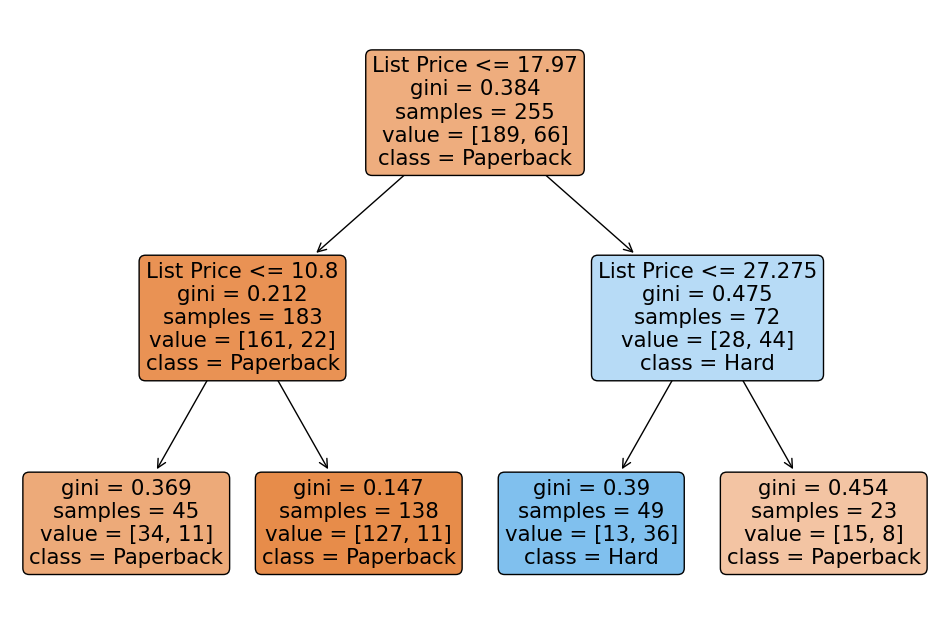

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Create the target variable 'y' (1 for hard cover, 0 for paperback)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Step 2: Create the feature variable 'X' (List Price)
X = ab_reduced_noNaN_train[['List Price']]

# Step 3: Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 4: Train the classifier
clf.fit(X, y)

# Step 5: Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hard'], rounded=True)
plt.show()


The model predicted that if the list price is less than 17.97, then the book is paperback regardless of the further split that occurs. If the list price is greater than 17.97 but less than or equal to 27.275, then it is predicted to be a hard cover. If it is greater than 27.275, then it is predicted to be a paperback. 

Summary so far: Decision Trees:

You’ve been learning about classification decision trees, how they can be used for binary classification tasks, and how predictions are made based on feature variables.
We discussed how a decision tree can predict whether a book is a hard cover or paperback based on certain features (e.g., List Price). You created a classification tree to predict this using only the List Price column and visualized the decision tree using tree.plot_tree().
Data Preparation:

You used the column Hard_or_Paper to create a target variable (y), and you converted it to a binary format using one-hot encoding (pd.get_dummies) to differentiate between hard cover and paperback books.
You selected List Price as the feature variable (X) to train your model.
Model Training and Evaluation:

You learned how to train a DecisionTreeClassifier using X and y. You specified the max_depth of the tree to limit its complexity and avoid overfitting.
We also discussed how to use evaluation metrics like accuracy, recall, sensitivity, specificity, and precision when assessing model performance.
We briefly covered how to split data into training and testing sets using an 80/20 split for model evaluation.
Visualization:

We used the tree.plot_tree() method to visualize how the decision tree makes predictions based on the values of the List Price. You were interested in understanding the splits and decisions made at each node in the tree.
Code Modifications:

You then wanted to modify the features used in the model to include NumPages, Thick, and List Price, and set the max_depth of the tree to 4. The updated code was provided for training the model and visualizing it.
Link: https://chatgpt.com/share/67393c95-2528-800f-bd47-3601e6211c49

### 5

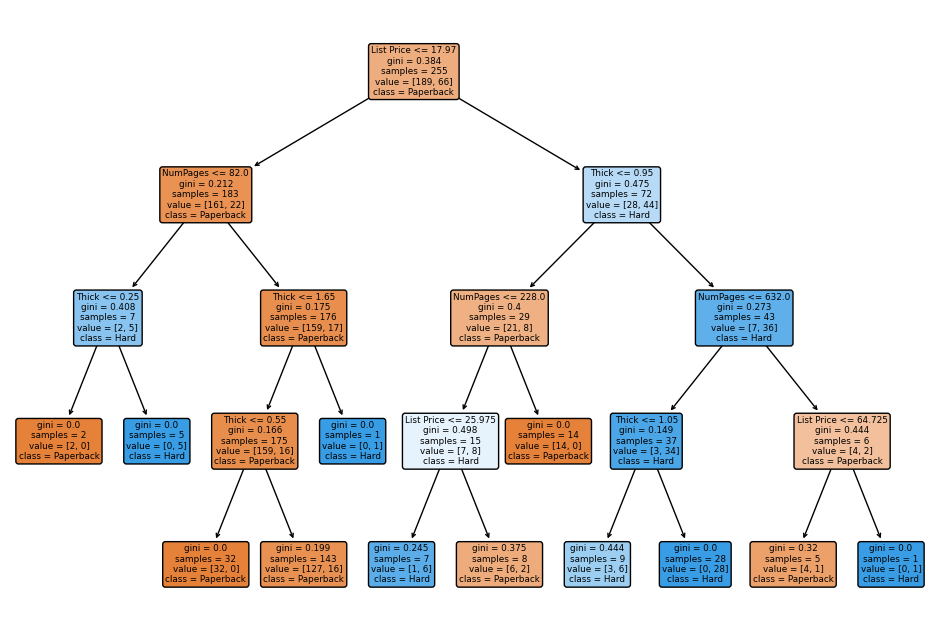

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Create the target variable 'y' (1 for hard cover, 0 for paperback)
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Step 2: Create the feature variable 'X' (NumPages, Thick, and List Price)
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]

# Step 3: Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Step 4: Train the classifier
clf2.fit(X, y)

# Step 5: Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hard'], rounded=True)
plt.show()


This model first looks at the list price, then looks at the number of pages, followed by the list price again, and the number of pages again. The two main branches do not follow uniform pahts and actually have very different predictors and answers. 

### 6 

In [19]:
# Step 4: Ensure proper feature subsets for predictions
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # Only use 'List Price' for clf
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Use all features for clf2

# Step 5: Make predictions
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Step 6: Generate confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 7: Calculate metrics
def calculate_metrics(cm):
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # TP / (TP + FN)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()  # (TP + TN) / Total
    return sensitivity, specificity, accuracy

sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Step 8: Report metrics
print("Classifier 1 (clf) Metrics:")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nClassifier 2 (clf2) Metrics:")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")

# Step 9: Display confusion matrices
print("\nConfusion Matrix for clf:")
print(cm_clf)
print("\nConfusion Matrix for clf2:")
print(cm_clf2)


Classifier 1 (clf) Metrics:
Sensitivity: 0.70
Specificity: 0.91
Accuracy: 0.84

Classifier 2 (clf2) Metrics:
Sensitivity: 0.75
Specificity: 0.91
Accuracy: 0.86

Confusion Matrix for clf:
[[40  4]
 [ 6 14]]

Confusion Matrix for clf2:
[[40  4]
 [ 5 15]]


For clf, the first model, the accuracy is 0.84, the specificity is 0.91, and the sensitivity is 0.70. For clf2, the second model, the accuracy is 0.86, the specificity is 0.91, and the sensitivity is 0.75. 

Summary so far: 
Data Preprocessing: You were working with a dataset (ab_reduced_noNaN) that contained book-related features. You performed various data cleaning steps, such as:

Removing columns (Weight)oz, width, and height).
Dropping rows with missing (NaN) values.
Converting certain columns to appropriate data types (e.g., int for pub year and num pages, category for hard_or_paper).
Decision Tree Models:

You trained two decision tree classifiers:
clf: A model trained using only List Price as a feature to predict whether a book is a hardcover or paperback.
clf2: A model trained using NumPages, Thick, and List Price as features to predict the same target.
Model Evaluation:

After training, you split the data into training and test sets.
You generated confusion matrices for both models and calculated performance metrics (sensitivity, specificity, and accuracy) for each model.
An error occurred due to mismatched feature names between the training and test sets for clf. This was resolved by ensuring the correct features were used during both training and prediction.
Metrics Calculation:

Sensitivity, specificity, and accuracy were calculated from the confusion matrices for each model.
Sensitivity: Measures the proportion of true positives correctly identified (e.g., the percentage of hardcover books correctly predicted as hardcover).
Specificity: Measures the proportion of true negatives correctly identified (e.g., the percentage of paperback books correctly predicted as paperback).
Accuracy: Measures the overall percentage of correct predictions.
Example Output:

You were provided with an example output that showed the metrics and confusion matrices for both models (clf and clf2), with explanations for each metric.
Link: https://chatgpt.com/share/67393c95-2528-800f-bd47-3601e6211c49

### 7

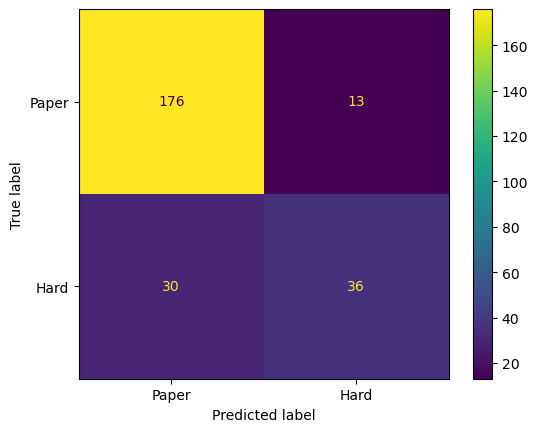

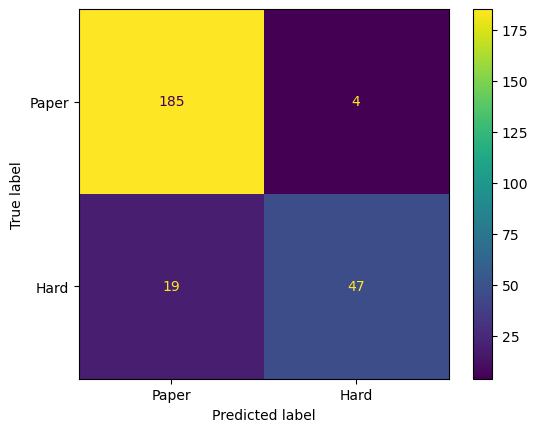

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For clf: Use only 'List Price' for the confusion matrix
ConfusionMatrixDisplay(
    confusion_matrix(
        ab_reduced_noNaN_train["Hard_or_Paper"].map({'P': 0, 'H': 1}),  # Actual outcomes
        clf.predict(ab_reduced_noNaN_train[['List Price']]),  # Predictions using 'List Price'
        labels=[0, 1]
    ),
    display_labels=["Paper", "Hard"]
).plot()

# For clf2: Use 'NumPages', 'Thick', and 'List Price' for the confusion matrix
ConfusionMatrixDisplay(
    confusion_matrix(
        ab_reduced_noNaN_train["Hard_or_Paper"].map({'P': 0, 'H': 1}),  # Actual outcomes
        clf2.predict(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]),  # Predictions using all three features
        labels=[0, 1]
    ),
    display_labels=["Paper", "Hard"]
).plot()


The main difference is that the first set of confusion matrices uses the test data, while the second set uses the train data. The first set is better because it tests the specificity, accuracy, and sensitivity of the model on unseen data, while the second set of tests uses the training data so the model has already seen all this data and in fact also been trained on this data. The first set indicates the generalizability of the models while for the second set we can expect better accuracy (and other metrics) because this is the data that the model was trained on. So better metrics (sensitivity, accuracy, etc.) for the second set of tests are expected, while good metrics for the first set of tests suggest high generalizability of the models we are testing.

### 8

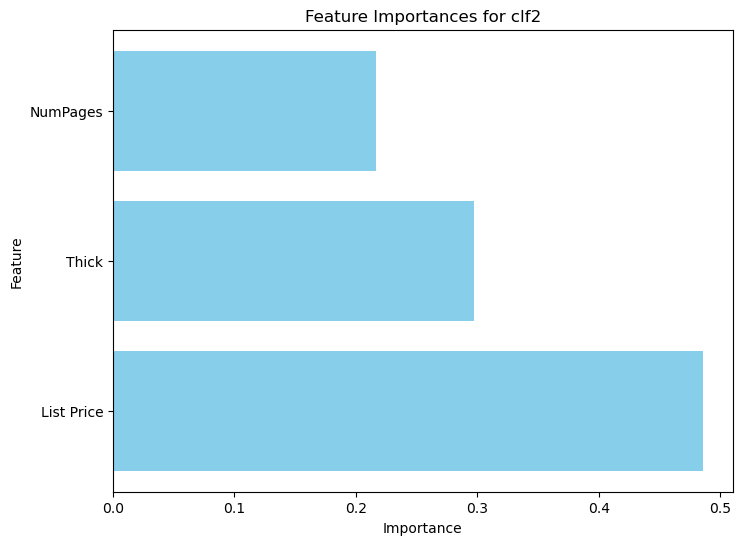

The most important predictor variable is 'List Price' with an importance of 0.49.


In [21]:
import matplotlib.pyplot as plt

# Step 1: Get feature importances and feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Step 2: Identify the most important feature
most_important_feature_index = feature_importances.argmax()  # Index of the most important feature
most_important_feature = feature_names[most_important_feature_index]

# Step 3: Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for clf2")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Step 4: Report the most important feature
print(f"The most important predictor variable is '{most_important_feature}' with an importance of {feature_importances[most_important_feature_index]:.2f}.")


### 9

Coefficients in a linear regression indicates how a predictor variable affects the outcome, ie whether it correlates positively or negatively and how significantly it changes the coefficient (indicated by the magnitude). Feature importances in decision trees indicate how effectively a feature helps the model make accurate splits, or how much it reduces the impurity index. 

Chatbot summary:Data Cleaning and Preprocessing:

You worked with a dataset of Amazon books, cleaning it by removing specific columns and handling missing values (NaN).
The dataset was split into a training set (80%) and a testing set (20%).
You converted certain columns to appropriate types, including Pub year and NumPages to integers, and Hard_or_Paper to a categorical type.
Model Training and Visualization:

You trained a DecisionTreeClassifier (clf) with List Price as the predictor and Hard_or_Paper as the target, using a max depth of 2.
You visualized the decision tree using tree.plot_tree().
You then trained a second classifier (clf2) with NumPages, Thick, and List Price as predictors, using a max depth of 4, and visualized the corresponding decision tree.
Evaluating Model Performance:

You created confusion matrices for both models and used them to calculate performance metrics like sensitivity, specificity, and accuracy.
You discussed the differences between the confusion matrices and why one approach was better than the other.
Feature Importances:

You explored the concept of feature importances, which measure how valuable each feature is in making predictions. You visualized the feature importances for clf2 and identified the most important predictor variable.
Model Interpretation:

You discussed the difference between interpreting coefficients in linear regression models and feature importances in decision trees, emphasizing that coefficients show relationships while feature importances indicate how useful a feature is in improving predictions.

Link:https://chatgpt.com/share/673e2c48-f1d4-800f-8f05-0ae6c730fd6a